In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
from scipy.optimize import curve_fit
import pandas as pd

$$
V = V_0 \sin [\omega_{LO}t+\phi_{LO}+\phi_N(t)]\\
\delta\omega_{RF}(t) = \dot{\phi}_N(t)
$$
Fourier transform:
$$
W_{RF}(\omega) = i\omega\Phi_N(\omega)+R
$$
Power spectrum density:
$$
S_{RF}(\omega)  = \frac{1}{4}\omega^2S_{phase}(\omega) 
$$
Trap secular frequency
$$
\omega_{trap} = \frac{eV}{\sqrt{2}mR^2}\frac{1}{\Omega_{RF}} = \frac{C}{\Omega_{RF}}\\
\delta\omega_{trap}(t) = -\frac{C}{\Omega_{RF}^2}\delta\Omega_{RF}(t)= -\frac{\omega_{trap}}{\Omega_{RF}}\delta\Omega_{RF}(t)
$$
Power spectrum density of secular frequency:
$$
S_{trap}(\omega) = lim_{T\rightarrow\infty}\frac{1}{T}<|\int^{T/2}_{-T/2}\delta\omega_{trap}(t)e^{-i\omega t}dt|^2> = \frac{\omega_{trap}^2}{\Omega_{RF}^2}S_{RF}(\omega)  = \frac{\omega_{trap}^2}{4\Omega_{RF}^2}\omega^2S_{phase}(\omega) 
$$

In [2]:
def plot_Angle(file_name, sheet_name):
    dfs = pd.read_excel(file_name, sheet_name=sheet_name)
    voltages = dfs.iloc[:,0]
    avg = dfs.iloc[:,4]
    std = dfs.iloc[:,5]
    title = dfs.columns[0]
    plt.errorbar(voltages, avg, yerr=std,ls='-',marker='o',mec='firebrick',ecolor='firebrick',mfc='pink')
    plt.xlabel('Applied voltage (V)')
    plt.ylabel('Angle (Deg)')
    plt.title(str(title))
    return dfs

In [26]:
f_RF = 48*10**6
f_secular = 2.4*10**6
const = f_secular/f_RF 
data = np.load('phasenoise_pickoff.npy')
data

array([[ 1.00000000e+01,  1.01936998e+01,  1.03912001e+01, ...,
         9.44060875e+05,  9.62350625e+05,  9.80994688e+05],
       [-1.06930000e+02, -1.06940002e+02, -1.12940002e+02, ...,
        -1.43929993e+02, -1.44600006e+02, -1.42929993e+02]])

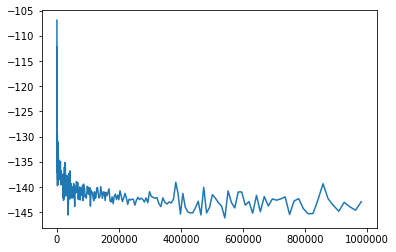

In [6]:
plt.plot(data[0,:],data[1,:])

In [43]:
freq = data[0,:]
PSD_phase = 10**(data[1,:]/10)
PSD_RF = [(2*np.pi*freq[i])**2/4*PSD_phase[i] for i in range(len(freq))]
PSD_trap = [const**2*PSD_RF[i] for i in range(len(freq))]

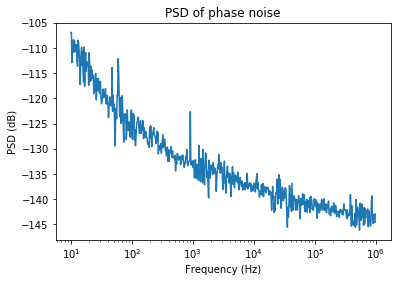

In [65]:
plt.plot(freq, np.log10(PSD_phase)*10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.title('PSD of phase noise')
plt.xscale("log")

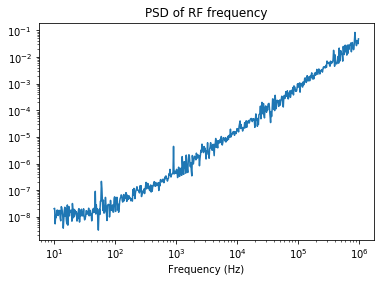

In [77]:
plt.plot(freq, PSD_RF)
plt.xlabel('Frequency (Hz)')
plt.ylabel('')
plt.title('PSD of RF frequency')
plt.xscale("log")
plt.yscale("log")

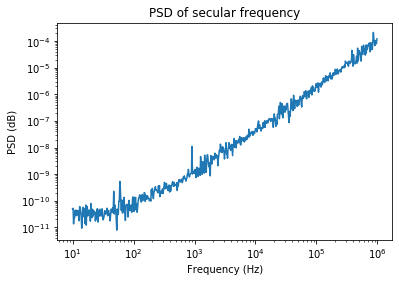

In [78]:
plt.plot(freq, PSD_trap)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.title('PSD of secular frequency')
plt.xscale("log")
plt.yscale("log")

Text(0.5, 1.0, 'PSD of secular frequency')

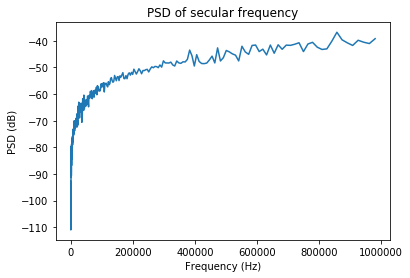

In [68]:
plt.plot(freq, np.log10(PSD_trap)*10)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB)')
plt.title('PSD of secular frequency')

$$
F_{av}(\tau) = \frac{1}{2}(1+exp[-\chi(\tau)])\\
\chi(\tau) = \frac{1}{\pi}\int^{\infty}_0\frac{d\omega}{\omega^2}S_{z}(\omega)G(\omega)
$$
$G(\omega)$ is the filter function

In [70]:
def chi(t, freq=freq, PSD_trap=PSD_trap):
    #func = [1/(2*np.pi*freq[i])**2*PSD_trap[i]/np.pi for i in range(len(freq))]
    func = [1/(2*np.pi*freq[i])**2*PSD_trap[i]*4*np.sin(2*np.pi*freq[i]*t/2)**2 for i in range(len(freq))]
    return np.trapz(func, x=freq)

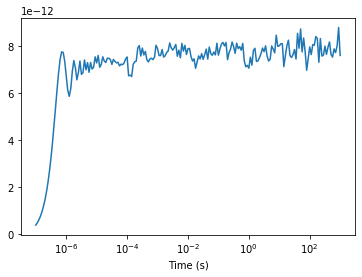

In [72]:
tlist = np.logspace(-7.0, 3.0, num=201)
chis = [chi(t) for t in tlist]
plt.plot(tlist, chis)
plt.xlabel('Time (s)')
plt.xscale("log")

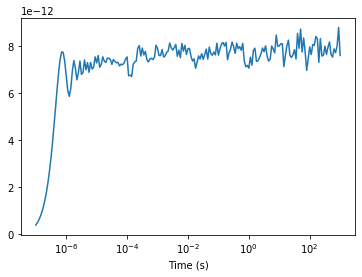

In [81]:
tlist = np.logspace(-7.0, 3.0, num=201)
chis = [chi(t) for t in tlist]
plt.plot(tlist, [1-np.exp(-1*chis[i]) for i in range(len(chis))])
plt.xlabel('Time (s)')
plt.xscale("log")